### 1. Data collection
Get data from twitter api

In [11]:
import tweepy
import json

with open('../assets/token.json', 'r') as f:
    token = json.loads(f.read())

auth = tweepy.OAuthHandler(
    token['api_key'], 
    token['api_key_secret']    
)
auth.set_access_token(
    token['access_token'], 
    token['access_token_secret']
)
api = tweepy.API(auth)

In [13]:
response = api.search_tweets(q='semeru', lang='id', count=200)

In [27]:
import pandas as pd
tweets = []
for res in response:
    tweets.append(res.text)
    
df = pd.DataFrame(data=tweets, columns=["tweet"])
df.head()

,tweet
0,kok bisa ye semeru di pilipin😭\n\n#Semeru #sem...
1,Semogo penduduk yg terkena dampak erupsi semer...
2,Sebanyak 45 Orang Alami Luka Bakar Erupsi Gunu...
3,"RT @kyberno: Jangan kasi inisial, karena ini s..."
4,RT @HarugonFC: Mari berdoa yang terbaik untuk ...


### 2. Clean dataset
 

In [28]:
import numpy as np
import string, re 
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk.util import ngrams
from Sastrawi.Stemmer.StemmerFactory import  StemmerFactory

In [56]:
# Case folding
df["clean_tweet"] = df["tweet"].apply(lambda x: x.lower())
df["clean_tweet"] = df["clean_tweet"].apply(lambda x: re.sub(
    r"\d+|(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", x
).strip())
df["clean_tweet"] = df["clean_tweet"].apply(lambda x: x.strip())
df["clean_tweet"] = df["clean_tweet"].apply(
    lambda x: x.translate(x.maketrans("", "", string.punctuation))
)

df.head()

,tweet,clean_tweet,tokenize
0,kok bisa ye semeru di pilipin😭\n\n#Semeru #sem...,kok bisa ye semeru di pilipin semeru semer...,"[ye, semeru, pilipin, semeru, semeruerupsi]"
1,Semogo penduduk yg terkena dampak erupsi semer...,semogo penduduk yg terkena dampak erupsi semer...,"[semogo, penduduk, yg, terkena, dampak, erupsi..."
2,Sebanyak 45 Orang Alami Luka Bakar Erupsi Gunu...,sebanyak orang alami luka bakar erupsi gunun...,"[orang, alami, luka, bakar, erupsi, gunung, se..."
3,"RT @kyberno: Jangan kasi inisial, karena ini s...",rt jangan kasi inisial karena ini sudah si...,"[rt, kasi, inisial, sial, nama, nya, randy, ba..."
4,RT @HarugonFC: Mari berdoa yang terbaik untuk ...,rt mari berdoa yang terbaik untuk saudara s...,"[rt, mari, berdoa, terbaik, saudara, saudara, ..."


In [57]:
# remove stop words
blackList = stopwords.words('indonesian')
blackList.extend(["yg", "kok", "dg", "ye", "rt"])
# print(type(blackList))

def stopWordRemoval(text):
    textList =  [word for word in text if word not in blackList]
    return " ".join(textList)

df["tokenize"] = df["clean_tweet"].apply(lambda x: word_tokenize(x))
df["clean_tweet"] = df["tokenize"].apply(stopWordRemoval)
df.head()


,tweet,clean_tweet,tokenize
0,kok bisa ye semeru di pilipin😭\n\n#Semeru #sem...,semeru pilipin semeru semeruerupsi,"[kok, bisa, ye, semeru, di, pilipin, semeru, s..."
1,Semogo penduduk yg terkena dampak erupsi semer...,semogo penduduk terkena dampak erupsi semeru k...,"[semogo, penduduk, yg, terkena, dampak, erupsi..."
2,Sebanyak 45 Orang Alami Luka Bakar Erupsi Gunu...,orang alami luka bakar erupsi gunung semeru lu...,"[sebanyak, orang, alami, luka, bakar, erupsi, ..."
3,"RT @kyberno: Jangan kasi inisial, karena ini s...",kasi inisial sial nama nya randy bagus sasongk...,"[rt, jangan, kasi, inisial, karena, ini, sudah..."
4,RT @HarugonFC: Mari berdoa yang terbaik untuk ...,mari berdoa terbaik saudara saudara wilayah gu...,"[rt, mari, berdoa, yang, terbaik, untuk, sauda..."


In [59]:
def stemming(text):
    # stemming
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    return stemmer.stem(text)

df["clean_tweet"] = df["clean_tweet"].apply(stemming)
df["tokenize"] = df["clean_tweet"].apply(lambda x:word_tokenize(x))

df.head()

,tweet,clean_tweet,tokenize
0,kok bisa ye semeru di pilipin😭\n\n#Semeru #sem...,meru pilipin meru semeruerupsi,"[meru, pilipin, meru, semeruerupsi]"
1,Semogo penduduk yg terkena dampak erupsi semer...,semogo duduk kena dampak erupsi meru sabar,"[semogo, duduk, kena, dampak, erupsi, meru, sa..."
2,Sebanyak 45 Orang Alami Luka Bakar Erupsi Gunu...,orang alami luka bakar erupsi gunung meru luka...,"[orang, alami, luka, bakar, erupsi, gunung, me..."
3,"RT @kyberno: Jangan kasi inisial, karena ini s...",kasi inisial sial nama nya randy bagus sasongk...,"[kasi, inisial, sial, nama, nya, randy, bagus,..."
4,RT @HarugonFC: Mari berdoa yang terbaik untuk ...,mari doa baik saudara saudara wilayah gunung m...,"[mari, doa, baik, saudara, saudara, wilayah, g..."


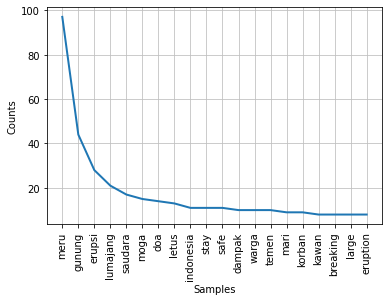

In [66]:
import matplotlib.pyplot as plt 

allTweets = [word for tweet in df["tokenize"] for word in tweet]
fqdist = FreqDist(allTweets)
fqdist.plot(20, cumulative=False)
plt.show()

In [69]:
import nltk
result = pd.Series(nltk.ngrams(allTweets, 2)).value_counts()[:20]
print(result)

(gunung, meru)        38
(erupsi, meru)        12
(stay, safe)          11
(erupsi, gunung)      11
(at, indonesia)        8
(mount, meru)          8
(s, mount)             8
(indonesia, s)         8
(dampak, erupsi)       8
(eruption, at)         8
(large, eruption)      8
(breaking, large)      8
(saudara, saudara)     7
(meru, moga)           6
(meru, erupsi)         6
(temen, temen)         5
(meru, letus)          5
(mari, doa)            5
(meru, letup)          5
(meru, lumajang)       5
dtype: int64


In [70]:
result = pd.Series(nltk.ngrams(allTweets, 3)).value_counts()[:20]
print(result)

(erupsi, gunung, meru)         10
(indonesia, s, mount)           8
(at, indonesia, s)              8
(eruption, at, indonesia)       8
(large, eruption, at)           8
(breaking, large, eruption)     8
(s, mount, meru)                8
(gunung, meru, letup)           5
(dampak, erupsi, meru)          5
(gunung, meru, moga)            5
(kawan, kawan, meru)            4
(gunung, meru, letus)           4
(u, ketiban, kanopi)            4
(stay, safe, kawan)             4
(bismillah, stay, safe)         4
(gunung, meru, lumajang)        4
(stay, safe, meru)              4
(safe, meru, randy)             4
(meru, randy, moga)             4
(randy, moga, u)                4
dtype: int64
